# 판다스 (Pandas)

<!-- requirement: data/yelp.json.gz -->
<!-- requirement: data/PEP_2016_PEPANNRES.csv -->

In [3]:
import pandas as pd

이전 강의에서 우리는 판다스 모듈과 데이터프레임 객체에 대해 다루었습니다. 우리는 데이터프레임을 구성해서 데이터를 추가하거나 얻기도 하고 또 하드디스크로부터 데이터 파일을 읽거나 쓰기도 했습니다.이제 여기서 우리는 데이터프레임 객체와 그것의 아주 파워풀한 분석 방법들을 보다 더 자세하게 살펴보겠습니다.

여기서는 온라인 리뷰 사이트인 Yelp의 데이터셋을 사용해 작업을 할 예정입니다. 파일은 압축된 JSON 파일로 저장됩니다.

In [5]:
import gzip
import json

with gzip.open('./data/yelp.json.gz', 'r') as f:
    yelp_data = [json.loads(line) for line in f]
    
yelp_df = pd.DataFrame(yelp_data)
yelp_df.head()    

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
0,vcNAWiLM4dR7D2nwwJ7nCA,"4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{'Tuesday': {'close': '17:00', 'open': '08:00'...",True,"[Doctors, Health & Medical]",Phoenix,7,"Eric Goldberg, MD",[],-111.983758,AZ,3.5,33.499313,{'By Appointment Only': True},business
1,JwUE5GmEO-sH1FuwJgKBlQ,"6162 US Highway 51\nDe Forest, WI 53532",{},True,[Restaurants],De Forest,26,Pine Cone Restaurant,[],-89.335844,WI,4.0,43.238893,"{'Take-out': True, 'Good For': {'dessert': Fal...",business
2,uGykseHzyS5xAMWoN6YUqA,"505 W North St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '06:00'}...",True,"[American (Traditional), Restaurants]",De Forest,16,Deforest Family Restaurant,[],-89.353437,WI,4.0,43.252267,"{'Take-out': True, 'Good For': {'dessert': Fal...",business
3,LRKJF43s9-3jG9Lgx4zODg,"4910 County Rd V\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '10:30'}...",True,"[Food, Ice Cream & Frozen Yogurt, Fast Food, R...",De Forest,7,Culver's,[],-89.374983,WI,4.5,43.251045,"{'Take-out': True, 'Wi-Fi': 'free', 'Takes Res...",business
4,RgDg-k9S5YD_BaxMckifkg,"631 S Main St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '11:00'}...",True,"[Chinese, Restaurants]",De Forest,3,Chang Jiang Chinese Kitchen,[],-89.343722,WI,4.0,43.240875,"{'Take-out': True, 'Has TV': False, 'Outdoor S...",business


## 판다스 데이터프레임과 시리즈 (Pandas DataFrame and Series)

판다스 데이터프레임은 고도로 구조화된 객체입니다. 데이터프레임에서 각각의 행은 어떤 물리적 개체 또는 이벤트에 해당합니다. 즉, 주어진 행의 모든 정보는 어떤 하나의 개체에 대해서 설명을 하고 있습니다. 또한 각 열에는 의미론적 혹은 구문론적인 한 범주로 구분된 데이터들이 포함됩니다.

In [3]:
yelp_df.dtypes

business_id       object
full_address      object
hours             object
open                bool
categories        object
city              object
review_count       int64
name              object
neighborhoods     object
longitude        float64
state             object
stars            float64
latitude         float64
attributes        object
type              object
dtype: object

데이터프레임은 `dict`와 같이 이름으로 열을 참조할 수도 있습니다.

In [4]:
yelp_df['city'].head()

0      Phoenix
1    De Forest
2    De Forest
3    De Forest
4    De Forest
Name: city, dtype: object

In [5]:
type(yelp_df['city'])

pandas.core.series.Series

데이터프레임에서 각각의 열은 판다스 `Series`입니다. `Series`에는 `name`과 `dtype`(NumPy 배열과 유사)이 있습니다. `DataFrame`은 본질적으로 `Series` 객체의 `dict`입니다. `Series`에는 행에 레이블을 지정하는 `index` 속성이 있습니다. 인덱스는 기본적으로 행을 참조하기 위한 키 집합입니다. 숫자, 문자열, 타임스탬프 또는 해시 가능한 파이썬 객체로 구성된 인덱스를 가질 수 있습니다. 인덱스 또한 동일한 유형으로 구성되어 있습니다.

In [6]:
yelp_df['city'].index

RangeIndex(start=0, stop=37938, step=1)

`DataFrame`에는 구성 요소인 `Series`의 인덱스 조합으로 제공되는 `index`가 있습니다. 이에 대해서는 나중에 더 자세히 살펴보겠습니다. `DataFrame`은 `Series`의 `dict`이기 때문에, 대괄호 표기법을 사용하여 열을 선택한 다음 행을 선택할 수 있지만 그 반대는 할 수 없습니다. 물론 판다스의 `loc` 메서드는 이러한 문제를 해결해줍니다.

In [7]:
# this works
yelp_df['city'][100]

'Madison'

In [8]:
# this doesn't
yelp_df[100]['city']

KeyError: 100

In [9]:
yelp_df.loc[100, 'city']

'Madison'

`DataFrame` 객체의 기본 구조를 `Series`의 `dict`라고 이해를 하면, 작업 과정에서 오류를 방지하고 더 복잡한 분석을 시작할 때 `DataFrame`이 어떻게 작동해야 하는지 생각하는 데 도움이 됩니다.

또한 `mean`, `sum`, `count` 및 `std`와 같은 방법을 사용하여 `DataFrame`의 데이터를 집계할 수 있습니다. 더불어 각 열에 대한 요약 통계 모음을 보려면 `describe` 메서드를 사용하면 됩니다.

In [10]:
yelp_df.describe()

,review_count,longitude,stars,latitude
count,37938.000000,37938.000000,37938.000000,37938.000000
mean,29.300648,-104.097172,3.672914,36.530288
std,92.893064,28.365375,0.888730,5.822588
min,3.000000,-115.369725,1.000000,32.876638
25%,4.000000,-115.136389,3.000000,33.476739
50%,8.000000,-112.068820,3.500000,33.680247
75%,21.000000,-111.883274,4.500000,36.141875
max,4084.000000,-3.050088,5.000000,56.033777


데이터프레임의 유용성은 `groupby` 메소드라는 것을 사용하여 데이터를 그룹으로 분할한 뒤 `apply` 혹은 `aggregate`이라는 메서드를 사용해서 사용자 정의 기반의 데이터 집계를 수행할 수 있다는 데서 비롯됩니다. 데이터를 그룹으로 분할하고 집계하여 결과를 취합하는 이러한 프로세스에 대해 더 자세하게 알아보기 위해서는 [판다스 공식문서](https://pandas.pydata.org/pandas-docs/stable/groupby.html)를 참고하면 좋습니다. 이번 강의의 주요 목적은 바로 이 데이터 분석입니다.

## 데이터프레임 생성 (DataFrame construction)

`DataFrame`은 결국 `Series`의 `dict`이므로, 이를 생성하는 기본적인 방법은 당연히 `Series` 객체들의 `dict`를 활용하는 것입니다.

In [2]:
from string import ascii_letters, digits
import numpy as np
import datetime

In [12]:
usernames = ['alice36', 'bob_smith', 'eve']

passwords = [''.join(np.random.choice(list(ascii_letters + digits), 8)) for x in range(3)]
creation_dates = [datetime.datetime.now().date() - datetime.timedelta(int(x)) for x in np.random.randint(0, 1500, 3)]

In [13]:
df = pd.DataFrame({'username': usernames, 'password': passwords, 'date-created': pd.to_datetime(creation_dates)})
df

,username,password,date-created
0,alice36,ylLec08T,2018-11-15
1,bob_smith,dCIxPiNM,2020-09-07
2,eve,yHdBxedI,2018-03-28


In [14]:
df.dtypes

username                object
password                object
date-created    datetime64[ns]
dtype: object

`DataFrame`은 또한 넘파이의 `ndarray`와 밀접하게 연관되어 있습니다.

In [15]:
random_data = np.random.random((4,3))
random_data

array([[0.54895825, 0.60798748, 0.09158656],
       [0.97177048, 0.17686699, 0.44550966],
       [0.00604287, 0.31461326, 0.71514715],
       [0.06022502, 0.93218799, 0.07985685]])

In [16]:
df_random = pd.DataFrame(random_data, columns=['a', 'b', 'c'])
df_random

,a,b,c
0,0.548958,0.607987,0.091587
1,0.971770,0.176867,0.445510
2,0.006043,0.314613,0.715147
3,0.060225,0.932188,0.079857


새로운 열이나 행을 추가하기 위해서는 단순히 `dict`의 방식처럼 할당을 하면 됩니다.

In [17]:
emails = ['alice.chan@gmail.com', 'bwsmith1983@gmail.com', 'fakemail123@yahoo.com']
df['email'] = emails
df

,username,password,date-created,email
0,alice36,ylLec08T,2018-11-15,alice.chan@gmail.com
1,bob_smith,dCIxPiNM,2020-09-07,bwsmith1983@gmail.com
2,eve,yHdBxedI,2018-03-28,fakemail123@yahoo.com


In [18]:
# loc references index value, NOT position
# for position use iloc
df.loc[3] = ['2015-01-29', '38uzFJ1n', 'melvintherobot', 'moviesrgood@moviesrgood.com']
df

,username,password,date-created,email
0,alice36,ylLec08T,2018-11-15 00:00:00,alice.chan@gmail.com
1,bob_smith,dCIxPiNM,2020-09-07 00:00:00,bwsmith1983@gmail.com
2,eve,yHdBxedI,2018-03-28 00:00:00,fakemail123@yahoo.com
3,2015-01-29,38uzFJ1n,melvintherobot,moviesrgood@moviesrgood.com


또한 열이나 행을 `drop` 메서드를 사용해 제거할 수도 있습니다.

In [19]:
df.drop(3)

,username,password,date-created,email
0,alice36,ylLec08T,2018-11-15 00:00:00,alice.chan@gmail.com
1,bob_smith,dCIxPiNM,2020-09-07 00:00:00,bwsmith1983@gmail.com
2,eve,yHdBxedI,2018-03-28 00:00:00,fakemail123@yahoo.com


In [20]:
# to drop a column, need axis=1
df.drop('email', axis=1)

,username,password,date-created
0,alice36,ylLec08T,2018-11-15 00:00:00
1,bob_smith,dCIxPiNM,2020-09-07 00:00:00
2,eve,yHdBxedI,2018-03-28 00:00:00
3,2015-01-29,38uzFJ1n,melvintherobot


위의 예시에서 이미 세번째 인덱스의 행을 삭제했음에도 불구하고 이 행이 데이터프레임에 그대로 남아있는 것을 확인할 수 있습니다. 판다스 내에서 대부분의 작업은 `DataFrame` 객체 자체를 수정하는 대신 이것의 복사본을 반환하게 되어있습니다. 따라서 만약 어떤 데이터프레임을 영구적으로 변경하고 싶다면 `df` 변수를 다시 할당하거나 `inplace`라는 키워드를 사용해야 합니다.

In [21]:
df.drop(3, inplace=True)
df

,username,password,date-created,email
0,alice36,ylLec08T,2018-11-15 00:00:00,alice.chan@gmail.com
1,bob_smith,dCIxPiNM,2020-09-07 00:00:00,bwsmith1983@gmail.com
2,eve,yHdBxedI,2018-03-28 00:00:00,fakemail123@yahoo.com


`index`와 열 이름은 데이터프레임의 데이터와 상호 작용하는 데 중요하기 때문에 우리가 직관적으로 이해할 수 있는 값들로 설정해야 합니다. 인덱스 값과 열 이름을 설정하는 것은 데이터프레임을 처음 생성할 때나 혹은 추후에 이를 수정할 때 모두 가능합니다.

In [22]:
df = pd.DataFrame({'email': emails, 'password': passwords, 'date-created': creation_dates}, index=usernames)
df.index.name = 'users' # it can be helpful to give the index a name
df

,email,password,date-created
users,,,
alice36,alice.chan@gmail.com,ylLec08T,2018-11-15
bob_smith,bwsmith1983@gmail.com,dCIxPiNM,2020-09-07
eve,fakemail123@yahoo.com,yHdBxedI,2018-03-28


In [23]:
# alternatively
df = pd.DataFrame(list(zip(usernames, emails, passwords, creation_dates)))
df

,0,1,2,3
0,alice36,alice.chan@gmail.com,ylLec08T,2018-11-15
1,bob_smith,bwsmith1983@gmail.com,dCIxPiNM,2020-09-07
2,eve,fakemail123@yahoo.com,yHdBxedI,2018-03-28


In [24]:
df.columns = ['username', 'email', 'password', 'date-created']
df.set_index('username', inplace=True)
df

,email,password,date-created
username,,,
alice36,alice.chan@gmail.com,ylLec08T,2018-11-15
bob_smith,bwsmith1983@gmail.com,dCIxPiNM,2020-09-07
eve,fakemail123@yahoo.com,yHdBxedI,2018-03-28


In [25]:
# to reset index to a column
df.reset_index(inplace=True)
df

,username,email,password,date-created
0,alice36,alice.chan@gmail.com,ylLec08T,2018-11-15
1,bob_smith,bwsmith1983@gmail.com,dCIxPiNM,2020-09-07
2,eve,fakemail123@yahoo.com,yHdBxedI,2018-03-28


데이터프레임에서는 또한 다중 레벨로 구성된 인덱스를 가질 수도 있습니다. 일부 데이터 세트의 경우 행을 고유하게 식별하기 위해 인덱스에 대해 여러 레벨이 필요하다는 것을 알게 될 것입니다.

In [26]:
df.set_index(['username', 'email'])

,,password,date-created
username,email,,
alice36,alice.chan@gmail.com,ylLec08T,2018-11-15
bob_smith,bwsmith1983@gmail.com,dCIxPiNM,2020-09-07
eve,fakemail123@yahoo.com,yHdBxedI,2018-03-28


### 파일로부터 데이터 읽기 (Reading data from file)

우리는 또한 데이터프레임을 사용해 파일에 저장되어 있거나 웹사이트로부터 받을 수 있는 데이터를 불러올 수도 있습니다. 이러한 데이터 소스에는 [JSON](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_json.html), [HTML](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_html.html), [CSV](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv), [Excel](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html), [Python pickle](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_pickle.html), 혹은 심지어 [데이터베이스](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql.html) 등이 있습니다. 각각의 형식은 서로 다른 인자들을 사용해 데이터를 읽거나 쓸 수 있도록 구성되어 있습니다. 이러한 방법들의 인자들은 보통 파일의 특정한 형식에 의존하고 있습니다. 예를 들어, CSV 파일의 값들은 쉼표나 세미콜론으로 분리되어 있고, 헤더가 있거나 없기도 합니다.

`read_csv` 메서드는 대부분 형식 지정 가능성을 처리해야 하므로, 여기서는 몇 가지 예시를 통해 이 방법을 살펴보겠습니다. 다른 파일 형식으로 작업할 때 이러한 아이디어를 적용해 보세요. 하지만 각각의 형식과 읽기 방법이 다르다는 것을 염두에 둘 필요가 있습니다. 데이터를 읽거나 쓰는 데 문제가 있는 경우 우리는 언제나 [판다스 공식문서](http://pandas.pydata.org/pandas-docs/stable/io.html)를 참고할 수 있습니다.

In [29]:
csv = [','.join(map(lambda x: str(x), row)) for row in np.vstack([df.columns, df])]
with open('./data/read_csv_example.csv', 'w') as f:
    [f.write(line + '\n') for line in csv]

In [30]:
pd.read_csv('./data/read_csv_example.csv')

,username,email,password,date-created
0,alice36,alice.chan@gmail.com,ylLec08T,2018-11-15
1,bob_smith,bwsmith1983@gmail.com,dCIxPiNM,2020-09-07
2,eve,fakemail123@yahoo.com,yHdBxedI,2018-03-28


In [31]:
# we can also set an index from the data
pd.read_csv('./data/read_csv_example.csv', index_col=0)

,email,password,date-created
username,,,
alice36,alice.chan@gmail.com,ylLec08T,2018-11-15
bob_smith,bwsmith1983@gmail.com,dCIxPiNM,2020-09-07
eve,fakemail123@yahoo.com,yHdBxedI,2018-03-28


In [33]:
# what if our data had no header?
with open('./data/read_csv_noheader_example.csv', 'w') as f:
    [f.write(line + '\n') for i, line in enumerate(csv) if i != 0]

In [34]:
pd.read_csv('./data/read_csv_noheader_example.csv', names=['username', 'email', 'password', 'date-created'], header=None)

,username,email,password,date-created
0,alice36,alice.chan@gmail.com,ylLec08T,2018-11-15
1,bob_smith,bwsmith1983@gmail.com,dCIxPiNM,2020-09-07
2,eve,fakemail123@yahoo.com,yHdBxedI,2018-03-28


In [35]:
# what if our data was tab-delimited?
tsv = ['\t'.join(map(lambda x: str(x), row)) for row in np.vstack([df.columns, df])]
with open('./data/read_csv_example.tsv', 'w') as f:
    [f.write(line + '\n') for line in tsv]

In [36]:
pd.read_csv('./data/read_csv_example.tsv', delimiter='\t')

,username,email,password,date-created
0,alice36,alice.chan@gmail.com,ylLec08T,2018-11-15
1,bob_smith,bwsmith1983@gmail.com,dCIxPiNM,2020-09-07
2,eve,fakemail123@yahoo.com,yHdBxedI,2018-03-28


## 데이터프레임 필터링 (Filtering DataFrames)

판다스 데이터프레임의 강력한 분석 도구 중 하나는 바로 데이터 필터링 구문입니다. 종종 우리는 특정 기준에 따라 데이터의 특정 하위 집합으로 작업하기를 원할 것입니다. 예를 들어, Yelp 데이터를 살펴보겠습니다.

In [37]:
yelp_df.head()

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
0,vcNAWiLM4dR7D2nwwJ7nCA,"4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{'Tuesday': {'close': '17:00', 'open': '08:00'...",True,"[Doctors, Health & Medical]",Phoenix,7,"Eric Goldberg, MD",[],-111.983758,AZ,3.5,33.499313,{'By Appointment Only': True},business
1,JwUE5GmEO-sH1FuwJgKBlQ,"6162 US Highway 51\nDe Forest, WI 53532",{},True,[Restaurants],De Forest,26,Pine Cone Restaurant,[],-89.335844,WI,4.0,43.238893,"{'Take-out': True, 'Good For': {'dessert': Fal...",business
2,uGykseHzyS5xAMWoN6YUqA,"505 W North St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '06:00'}...",True,"[American (Traditional), Restaurants]",De Forest,16,Deforest Family Restaurant,[],-89.353437,WI,4.0,43.252267,"{'Take-out': True, 'Good For': {'dessert': Fal...",business
3,LRKJF43s9-3jG9Lgx4zODg,"4910 County Rd V\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '10:30'}...",True,"[Food, Ice Cream & Frozen Yogurt, Fast Food, R...",De Forest,7,Culver's,[],-89.374983,WI,4.5,43.251045,"{'Take-out': True, 'Wi-Fi': 'free', 'Takes Res...",business
4,RgDg-k9S5YD_BaxMckifkg,"631 S Main St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '11:00'}...",True,"[Chinese, Restaurants]",De Forest,3,Chang Jiang Chinese Kitchen,[],-89.343722,WI,4.0,43.240875,"{'Take-out': True, 'Has TV': False, 'Outdoor S...",business


Yelp 데이터 세트에 `state` 열이 있는 것을 볼 수 있습니다. 애리조나(AZ)의 비즈니스에만 관심이 있는 경우 데이터프레임을 필터링하고 해당 데이터만을 선택할 수 있습니다.

In [38]:
az_yelp_df = yelp_df[yelp_df['state'] == 'AZ']
az_yelp_df.head()

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
0,vcNAWiLM4dR7D2nwwJ7nCA,"4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{'Tuesday': {'close': '17:00', 'open': '08:00'...",True,"[Doctors, Health & Medical]",Phoenix,7,"Eric Goldberg, MD",[],-111.983758,AZ,3.5,33.499313,{'By Appointment Only': True},business
297,x5Mv61CnZLohZWxfCVCPTQ,"2819 N Central Ave\nPhoenix, AZ 85004",{},True,"[Sandwiches, Pizza, Chicken Wings, Restaurants]",Phoenix,12,Domino's Pizza,[],-112.073418,AZ,2.5,33.479542,"{'Take-out': True, 'Wi-Fi': 'no', 'Alcohol': '...",business
298,2ZnCITVa0abGce4gZ6RhIw,"1850 N Central Ave\nPhoenix, AZ 85004",{},True,"[American (New), Sandwiches, Restaurants]",Phoenix,5,Viad Tower Restaurants,[],-112.074315,AZ,3.5,33.468988,"{'Take-out': True, 'Noise Level': 'quiet', 'De...",business
299,EmzaQR5hQlF0WIl24NxAZA,"132 E Washington St\nPhoenix, AZ 85004","{'Sunday': {'close': '02:00', 'open': '21:00'}...",True,"[American (New), Nightlife, Dance Clubs, Resta...",Phoenix,20,Sky Lounge,[],-112.071702,AZ,2.5,33.448399,"{'Alcohol': 'full_bar', 'Price Range': 1, 'Noi...",business
300,SiwN7f0N4bs4ZtPc4yPgiA,"710 N Central Ave\nPhoenix, AZ 85004",{},True,"[Nightlife, Dance Clubs]",Phoenix,15,Palazzo,[],-112.074225,AZ,2.5,33.456068,"{'Price Range': 2, 'Alcohol': 'full_bar', 'Goo...",business


In [39]:
az_yelp_df['state'].unique()

array(['AZ'], dtype=object)

또한 논리 연산을 사용하여 기준을 결합할 수도 있습니다. 만약 애리조나 주에서 리뷰가 10개 이상인 비즈니스에만 관심이 있다면 어떻게 필터링을 할 수 있을까요?

In [40]:
yelp_df[(yelp_df['state'] == 'AZ') & (yelp_df['review_count'] > 10)].head()

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
297,x5Mv61CnZLohZWxfCVCPTQ,"2819 N Central Ave\nPhoenix, AZ 85004",{},True,"[Sandwiches, Pizza, Chicken Wings, Restaurants]",Phoenix,12,Domino's Pizza,[],-112.073418,AZ,2.5,33.479542,"{'Take-out': True, 'Wi-Fi': 'no', 'Alcohol': '...",business
299,EmzaQR5hQlF0WIl24NxAZA,"132 E Washington St\nPhoenix, AZ 85004","{'Sunday': {'close': '02:00', 'open': '21:00'}...",True,"[American (New), Nightlife, Dance Clubs, Resta...",Phoenix,20,Sky Lounge,[],-112.071702,AZ,2.5,33.448399,"{'Alcohol': 'full_bar', 'Price Range': 1, 'Noi...",business
300,SiwN7f0N4bs4ZtPc4yPgiA,"710 N Central Ave\nPhoenix, AZ 85004",{},True,"[Nightlife, Dance Clubs]",Phoenix,15,Palazzo,[],-112.074225,AZ,2.5,33.456068,"{'Price Range': 2, 'Alcohol': 'full_bar', 'Goo...",business
301,M-MFa0YErVBbFW2IJhGJmw,"386 E Virginia Ave\nPhoenix, AZ 85004","{'Tuesday': {'close': '18:00', 'open': '07:30'...",True,"[Auto Repair, Automotive, Tires, Oil Change St...",Phoenix,28,Virginia Auto Service,[],-112.065806,AZ,4.0,33.476784,{},business
302,KPoTixdjoJxSqRSEApSAGg,"2631 N Central Ave\nPhoenix, AZ 85004","{'Monday': {'close': '21:00', 'open': '11:00'}...",True,"[Thai, Restaurants]",Phoenix,281,Wild Thaiger,[],-112.073524,AZ,4.0,33.477934,"{'Take-out': True, 'Wi-Fi': 'no', 'Good For': ...",business


그렇다면 과연 이 필터링은 어떻게 작동하는 것일까요?

우선, `yelp_df['state'] == 'AZ'`를 작성할 때 판다스는 `state` 열을 선택하고 각 행이 `AZ`인지 확인합니다. 만약 `AZ`가 맞다면 해당 행은 `True`로 표시되고, 그렇지 않으면 `False`로 표시됩니다. 이것은 우리가 일반적으로 조건문이 작동할 것으로 예상하는 방식이며 여기서는 이것이 판다스 `Series`에 적용됩니다. 결과적으로 불리언 대수로 구성된 판다스의 `Series`로 얻을 수 있습니다.

In [41]:
(yelp_df['state'] == 'AZ').head()

0     True
1    False
2    False
3    False
4    False
Name: state, dtype: bool

불리언 대수로 구성된 `Series`(또는 유사한 객체)를 사용하여 데이터프레임을 인덱싱할 수도 있습니다.

In [42]:
df

,username,email,password,date-created
0,alice36,alice.chan@gmail.com,ylLec08T,2018-11-15
1,bob_smith,bwsmith1983@gmail.com,dCIxPiNM,2020-09-07
2,eve,fakemail123@yahoo.com,yHdBxedI,2018-03-28


In [43]:
df[[True, False, True]]

,username,email,password,date-created
0,alice36,alice.chan@gmail.com,ylLec08T,2018-11-15
2,eve,fakemail123@yahoo.com,yHdBxedI,2018-03-28


그밖에도 `yelp_df['review_count'] > 10`과 같은 관용적인 논리 표현식을 사용하여 데이터프레임을 필터링하는 것도 가능합니다.

또 다른 예로, 비즈니스가 열려 있는지 여부에 대한 `True`/`False` 플래그도 구성된 `open` 열을 고려해 보겠습니다. 이 또한 불리언 대수로 구성된 판다스 `Series`이므로 직접적으로 필터링을 하는데 사용될 수 있습니다.

In [44]:
# the open businesses
yelp_df[yelp_df['open']].head()

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
0,vcNAWiLM4dR7D2nwwJ7nCA,"4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{'Tuesday': {'close': '17:00', 'open': '08:00'...",True,"[Doctors, Health & Medical]",Phoenix,7,"Eric Goldberg, MD",[],-111.983758,AZ,3.5,33.499313,{'By Appointment Only': True},business
1,JwUE5GmEO-sH1FuwJgKBlQ,"6162 US Highway 51\nDe Forest, WI 53532",{},True,[Restaurants],De Forest,26,Pine Cone Restaurant,[],-89.335844,WI,4.0,43.238893,"{'Take-out': True, 'Good For': {'dessert': Fal...",business
2,uGykseHzyS5xAMWoN6YUqA,"505 W North St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '06:00'}...",True,"[American (Traditional), Restaurants]",De Forest,16,Deforest Family Restaurant,[],-89.353437,WI,4.0,43.252267,"{'Take-out': True, 'Good For': {'dessert': Fal...",business
3,LRKJF43s9-3jG9Lgx4zODg,"4910 County Rd V\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '10:30'}...",True,"[Food, Ice Cream & Frozen Yogurt, Fast Food, R...",De Forest,7,Culver's,[],-89.374983,WI,4.5,43.251045,"{'Take-out': True, 'Wi-Fi': 'free', 'Takes Res...",business
4,RgDg-k9S5YD_BaxMckifkg,"631 S Main St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '11:00'}...",True,"[Chinese, Restaurants]",De Forest,3,Chang Jiang Chinese Kitchen,[],-89.343722,WI,4.0,43.240875,"{'Take-out': True, 'Has TV': False, 'Outdoor S...",business


In [45]:
# the closed businesses
yelp_df[~yelp_df['open']].head()

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
5,oLctHIA1AxmsgOuu4dM6Vw,"4156 County Rd B\nMc Farland, WI 53558",{},False,"[Television Stations, Mass Media]",Mc Farland,10,Charter Communications,[],-89.322920,WI,1.5,42.968507,{},business
14,HxPpZSY6Q1eARuiahhra6A,"6401 University Ave\nMiddleton, WI 53562",{},False,"[Event Planning & Services, Party & Event Plan...",Middleton,5,Crandalls Carryout & Catering,[],-89.491800,WI,4.0,43.093265,"{'Take-out': True, 'Caters': True, 'Attire': '...",business
16,77ESrCo7hQ96VpCWWdvoxg,"6230 University Ave\nMiddleton, WI 53562","{'Monday': {'close': '21:00', 'open': '06:00'}...",False,"[Mexican, Restaurants]",Middleton,17,Mi Cocina,[],-89.487487,WI,3.0,43.091061,"{'Take-out': True, 'Wi-Fi': 'no', 'Good For': ...",business
50,IEmqrFe96NOhU07TA0rZdw,"6625 Century Ave\nMiddleton, WI 53562",{},False,"[American (Traditional), Restaurants]",Middleton,7,Stamm House At Pheasant Branch,[],-89.494422,WI,2.0,43.104535,"{'Alcohol': 'full_bar', 'Attire': 'casual', 'P...",business
62,mbtGl2I2A2To-8jiggN99g,"6661 University Ave\nSte 103\nMiddleton, WI 53562","{'Tuesday': {'close': '20:00', 'open': '10:00'...",False,"[Skin Care, Hair Salons, Beauty & Spas]",Middleton,7,Tangles,[],-89.497265,WI,2.0,43.096650,"{'By Appointment Only': True, 'Parking': {'gar...",business


이전 표현식에서 우리가 `(yelp_df['state'] == 'AZ') & (yelp_df['review_count'] > 10)`라고 쓴 것에 주목할 필요가 있습니다. 일반적으로 파이썬에서는 논리 작업을 할 때 `and`라는 단어를 사용합니다. 하지만 판다스에서는 비트 단위의(**bit-wise**) 논리 연산자를 사용해야 합니다.

`~` = `not`  
`&` = `and`  
`|` = `or`  

패턴 일치를 수행하기 위해 판다스의 내장 [문자열 작업](https://pandas.pydata.org/pandas-docs/stable/text.html)을 사용할 수도 있습니다. 예를 들어, 현재의 데이터 세트에서는 라스베가스에 많은 비즈니스가 있는 것을 알 수 있습니다. 하지만 'Las Vegas East'와 'South Las Vegas'에도 사업체가 있습니다. 만약 라스베가스 지역에 관련된 모든 비즈니스를 얻으려면 아래와 같이 필터링을 할 수 있습니다.

In [46]:
vegas_yelp_df = yelp_df[yelp_df['city'].str.contains('Vegas')]
vegas_yelp_df.head()

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
4348,uzztTCsg3XAKlYqmLO40aw,"5835 S Eastern Ave\nSoutheast\nLas Vegas, NV 8...","{'Monday': {'close': '21:00', 'open': '10:00'}...",True,"[Arts & Entertainment, Shopping, Books, Mags, ...",Las Vegas,7,Psychic Eye Book Shops,[Southeast],-115.119422,NV,4.5,36.083936,"{'Parking': {'garage': False, 'street': False,...",business
4360,IspFZDcpu9W5NvvJ7QgJZg,The Forum Shops At Caesars\n3500 Las Vegas Blv...,"{'Monday': {'close': '21:00', 'open': '10:00'}...",True,"[Women's Clothing, Men's Clothing, Fashion, Sh...",Las Vegas,6,Gap,[Eastside],-115.146372,NV,4.5,36.124423,"{'Parking': {'garage': True, 'street': False, ...",business
4364,Dvulg9cc3XHkt5DkBUekhw,467 E Silverado Ranch Blvd\nSte 175\nSoutheast...,{},True,"[Hair Salons, Beauty & Spas]",Las Vegas,10,Great Clips,[Southeast],-115.153303,NV,2.5,36.012150,"{'By Appointment Only': False, 'Parking': {'ga...",business
4441,_SM8UKIwBNbmj1r629ipoQ,"1916 Village Center Cir\nSummerlin\nLas Vegas,...","{'Monday': {'close': '23:00', 'open': '11:00'}...",False,"[Wine Bars, Bars, Restaurants, Nightlife, Ital...",Las Vegas,9,Chianti Cafe,[Summerlin],-115.304396,NV,3.5,36.192414,"{'Alcohol': 'full_bar', 'Music': {'video': Fal...",business
4489,Zaw0IAXwopKX4MV23MHQRw,"2718 E Tropicana Avenue\nEastside\nLas Vegas, ...",{},True,"[Car Wash, Automotive]",Las Vegas,3,Terrible Herbst,"[Eastside, Southeast]",-115.113492,NV,1.5,36.100507,{},business


In [47]:
vegas_yelp_df['city'].unique()

array(['Las Vegas', 'North Las Vegas', 'N Las Vegas', 'N. Las Vegas',
       'C Las Vegas', 'Las Vegas ', 'Las Vegas, NV 89147',
       'Las Vegas East', 'North Las Vegas ', 'N E Las Vegas',
       'N W Las Vegas', 'Lake Las Vegas', 'South Las Vegas'], dtype=object)

## 함수 적용과 데이터 집계

데이터 프레임의 데이터를 분석하기 위해서는 데이터 프레임에 함수를 적용할 수 있어야 합니다. 판다스ndas에는 이미 많은 수학 함수가 내장되어 있고, 데이터프레임과 시리즈는 기본적으로 넘파이의 배열처럼 동작하기 때문에 우리는 이를 넘파이 함수에 전달할 수도 있습니다.

In [6]:
log_review_count = np.log(yelp_df['review_count'])
print(log_review_count.head())
print(log_review_count.shape)

0    1.945910
1    3.258097
2    2.772589
3    1.945910
4    1.098612
Name: review_count, dtype: float64
(37938,)


In [7]:
mean_review_count = yelp_df['review_count'].mean()
print(mean_review_count)

29.300648426379883


첫 번째 예시에서는 각 비즈니스에 대한 리뷰 수에다가 로그를 취했고, 두 번째에서는 모든 비즈니스의 평균 리뷰 수를 계산했습니다. 첫 번째 예시에서는 각각의 비즈니스가 숫자로 표시되어 있습니다. 또한 우리는 로그를 취하여 리뷰 카운트를 변환했습니다. 두 번째 경우에는 모든 비즈니스의 리뷰 수를 하나의 숫자로 요약했습니다. 이는 데이터 집계의 한 형태이고, 이것은 많은 데이터를 가져와 더 작은 표현으로 결합합니다. 데이터 세트에 적용하는 함수들은 변환(**transformations**) 또는 집계(**aggreagtions**)의 범주에 속합니다.

때로는 데이터가 사용가능한 형태를 띄도록 우리는 데이터를 변환할 필요가 있습니다. 예를 들어, 데이터프레임의 `attributes` 열에는 모든 속성을 나열하는 각 비즈니스에 대한 `dict`가 있습니다. 만약 배달 서비스를 제공하는 레스토랑을 찾으려면 해당 정보가 `attributes` 열에 있음에도 불구하고 데이터프레임을 필터링하기가 어려울 것입니다. 그렇기 때문에 이를 찾기 위해서는 먼저 `dict`를 더 유용한 형태로 변환해야 합니다.

In [8]:
def get_delivery_attr(attr_dict):
    return attr_dict.get('Delivery')

위의 함수는 `attributes` 열로부터 `dict`를 제공받으면 `Delivery` 키를 찾습니다. 만약 해당 키를 찾으면 그에 맞는 값을 반환합니다. 또한 키를 찾지 못하면 아무 것도 반환하지 않습니다.

In [9]:
print(get_delivery_attr(yelp_df.loc[0, 'attributes']))
print(get_delivery_attr(yelp_df.loc[1, 'attributes']))
print(get_delivery_attr(yelp_df.loc[2, 'attributes']))

None
False
False


모든 값을 얻기 위해 `yelp_df['attributes']`의 행을 반복할 수 있지만 더 좋은 방법이 있습니다. 데이터프레임과 시리즈네는 `np.log`에서 했던 것처럼 전체 데이터 세트에 한 번에 함수를 적용할 수 있는 `apply`라는 메소드가 있습니다.

In [10]:
delivery_attr = yelp_df['attributes'].apply(get_delivery_attr)
delivery_attr.head()

0     None
1    False
2    False
3    False
4     None
Name: attributes, dtype: object

우리는 이 변환된 정보를 사용하여 데이터프레임 상에 새 열을 만들 수 있습니다.

In [11]:
yelp_df['delivery'] = delivery_attr

# to find businesses that deliver
yelp_df[yelp_df['delivery'].fillna(False)].head()

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type,delivery
21,KTqNU4plO23583DYAMGXYg,"2411 Allen Blvd\nMiddleton, WI 53562",{},True,"[Sandwiches, Pizza, Chicken Wings, Restaurants]",Middleton,3,Domino's Pizza,[],-89.486219,WI,3.0,43.100384,"{'Take-out': True, 'Takes Reservations': False...",business,True
64,oc0rCahXOaJeHLzzDdSfyA,"1901 Cayuga St\nMiddleton, WI 53562",{},False,[Restaurants],Middleton,3,Soup Factory,[],-89.513737,WI,3.0,43.096359,"{'Take-out': True, 'Alcohol': 'none', 'Takes R...",business,True
75,OC8AUJshLVimn_-P_INvJw,"330 W Main St\nSun Prairie, WI 53590","{'Monday': {'close': '23:00', 'open': '11:00'}...",True,"[Sandwiches, Pizza, Chicken Wings, Restaurants]",Sun Prairie,4,Pizza Pit,[],-89.218527,WI,2.5,43.183277,"{'Take-out': True, 'Good For': {'dessert': Fal...",business,True
79,NDAxF0_RCZBQedVO_d5WnA,"984 W Main St\nSun Prairie, WI 53590",{},True,"[Chinese, Restaurants]",Sun Prairie,9,Chang Jiang,[],-89.230477,WI,3.0,43.180786,"{'Take-out': True, 'Wi-Fi': 'no', 'Good For': ...",business,True
82,5uxhIGZlJm9g_zfG_83z5Q,"2091 McCoy Rd\nSun Prairie, WI 53590",{},True,"[Chinese, Restaurants]",Sun Prairie,6,Peking Chinese Restaurant,[],-89.248245,WI,3.0,43.175381,"{'Delivery': True, 'Waiter Service': True, 'Ta...",business,True


하나의 열이 아닌 전체 데이터프레임에 `apply` 메서드를 사용하는 것은 가능은 하나 덜 일반적인 방법입니다. 그 이유는 일반적으로 데이터프레임에 서로 다른 유형의 데이터가 포함되어 있기 때문입니다.

## `groupby`를 활용한 데이터 집계

데이터 집계는 함수의 [오버로딩](https://en.wikipedia.org/wiki/Function_overloading)과 관련된 용어입니다. 이는 데이터 요약뿐만 아니라 서로 다른 데이터 세트의 결합을 의미합니다.

Yelp 데이터를 사용하여 여러 도시에 있는 기업의 별점을 비교하는 데 관심이 있을 수 있습니다. 우리는 각 도시의 평균 별점을 계산할 수 있으며, 이를 통해 쉽게 비교할 수 있습니다. 이를 위해서 먼저 데이터를 도시별로 분할하고 각 도시의 평균을 계산한 다음 마지막에 다시 결합해야 합니다. 이 절차는 소위 [split-apply-combine](https://pandas.pydata.org/pandas-docs/stable/groupby.html)으로 알려져 있으며 데이터 집계의 고전적인 예시입니다.

아래에서는 `groupby` 메서드를 사용하여 분할 및 재결합을 수행합니다.

In [12]:
stars_by_city = yelp_df.groupby('city')['stars'].mean()
stars_by_city.head()

city
Ahwatukee          3.687500
Anthem             3.781818
Apache Junction    3.637500
Arcadia            5.000000
Atlanta            3.500000
Name: stars, dtype: float64

한 번에 여러 함수들을 적용할 수도 있습니다. 예를 들어, 별점의 표준편차, 총 리뷰 수, 업체 수를 아는 것이 도움이 될 수 있으므로 우리는 아래와 같은 방법을 사용해 데이터를 집계할 수 있습니다.

In [13]:
agg_by_city = yelp_df.groupby('city').agg({'stars': ['mean', 'std'], 'review_count': 'sum', 'business_id': 'count'})
agg_by_city.head()

stars           review_count business_id
                     mean       std          sum       count
city                                                        
Ahwatukee        3.687500  1.066955          258           8
Anthem           3.781818  0.756231          727          55
Apache Junction  3.637500  1.028010          853          80
Arcadia          5.000000       NaN            4           1
Atlanta          3.500000       NaN           16           1

In [14]:
# unstacking the columns
new_columns = map(lambda x: '_'.join(x),
                  zip(agg_by_city.columns.get_level_values(0),
                      agg_by_city.columns.get_level_values(1)))
agg_by_city.columns = new_columns
agg_by_city.head()

,stars_mean,stars_std,review_count_sum,business_id_count
city,,,,
Ahwatukee,3.687500,1.066955,258,8
Anthem,3.781818,0.756231,727,55
Apache Junction,3.637500,1.028010,853,80
Arcadia,5.000000,NaN,4,1
Atlanta,3.500000,NaN,16,1


어떻게 이런 결과가 나왔을까요? 즉, `groupby`는 어떤 작업을 수행할까요? 먼저 `groupby`의 결과를 살펴보겠습니다.

In [15]:
by_city = yelp_df.groupby('city')
by_city

In [16]:
dir(by_city)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accessors',
 '_add_numeric_operations',
 '_agg_examples_doc',
 '_agg_see_also_doc',
 '_aggregate',
 '_aggregate_frame',
 '_aggregate_item_by_item',
 '_aggregate_multiple_funcs',
 '_apply_filter',
 '_apply_to_column_groupbys',
 '_apply_whitelist',
 '_assure_grouper',
 '_bool_agg',
 '_builtin_table',
 '_choose_path',
 '_concat_objects',
 '_constructor',
 '_cumcount_array',
 '_cython_agg_blocks',
 '_cython_agg_general',
 '_cython_table',
 '_cython_transform',
 '_define_paths',
 '_deprecations',
 '_dir_additions',
 '_dir_deletions',
 '_fill',
 '_ge

In [17]:
print(type(by_city.groups))
list(by_city.groups.items())[:5]

<class 'dict'>


[('Ahwatukee',
  Int64Index([1718, 1740, 13572, 17787, 20361, 22856, 28608, 30499], dtype='int64')),
 ('Anthem',
  Int64Index([ 1946,  1948,  1949,  1950,  1951,  1952,  1953,  1954,  1955,
               1956,  1957,  1958,  1961,  1962, 11455, 12008, 12572, 12870,
              13007, 13069, 13286, 13500, 13636, 13703, 13744, 13827, 13935,
              15483, 15581, 15756, 19358, 21295, 21303, 21327, 22354, 22428,
              22654, 22782, 23215, 24937, 25026, 26116, 26300, 26331, 26841,
              26937, 30039, 30170, 31565, 32525, 33027, 33492, 33983, 34663,
              35433],
             dtype='int64')),
 ('Apache Junction',
  Int64Index([ 2392,  2393,  2394,  2395,  2396,  2397,  2398,  2399,  2400,
               2401,  2402,  2403,  2404,  2406,  2407,  2408,  2409,  2410,
               2412,  2413,  2414,  2415,  2417,  2418,  2419,  7305,  7524,
               7525,  7528,  7529,  7530,  7531,  7532,  7533,  7534, 10813,
              11315, 11660, 12662, 12858, 12

In [18]:
by_city.get_group('Anthem').head()

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type,delivery
1946,Y0Ife2OJPs5QSL-7dyMF5Q,"4250 W Anthem Way\nSte 375\nAnthem, AZ 85086",{},True,"[Fashion, Shopping, Shoe Stores]",Anthem,8,Nike Factory Store,[],-112.150162,AZ,4.0,33.874003,"{'Parking': {'garage': False, 'street': False,...",business,None
1948,v1ocqAm5soWTNPttLQhSZw,"3434 W Anthem Way\nSte 118\nAnthem, AZ 85086",{},True,"[Chinese, Restaurants]",Anthem,50,Shanghai Club,[],-112.135305,AZ,3.5,33.864429,"{'Take-out': True, 'Wi-Fi': 'no', 'Good For': ...",business,False
1949,HMDymN9TbFUln9AkqHMpVw,"4250 W Anthem Way\nAnthem, AZ 85086",{},True,"[Department Stores, Fashion, Shopping]",Anthem,3,Polo Ralph Lauren Factory Store,[],-112.151046,AZ,3.0,33.875410,"{'Parking': {'garage': False, 'street': False,...",business,None
1950,XJv7dUb5fMRaZAWVZjhtvw,"4250 W Anthem Way\nAnthem, AZ 85086",{},True,"[Shopping, Outlet Stores]",Anthem,64,Outlets At Anthem,[],-112.149875,AZ,3.5,33.873311,"{'Parking': {'garage': False, 'street': False,...",business,None
1951,xPDbCj9tfp5nnGzYzoCHwA,"3655 W Anthem Way\nSte C105\nAnthem, AZ 85086",{},True,"[Sandwiches, Restaurants]",Anthem,6,Subway,[],-112.138854,AZ,3.0,33.864913,"{'Ambience': {'romantic': False, 'intimate': F...",business,None


열에 `groupby`를 사용하면 판다스는 열의 고유한 요소를 키로 사용하고 각 그룹의 행 인덱스를 값으로 사용하여 `dict`를 빌드합니다. 이후 이 `dict`는 `groups` 속성에 저장됩니다. 그러면 판다스는 다시 이 `dict`를 사용하여 다른 그룹에 대한 집계 기능의 적용을 지시할 수 있습니다.

## 순서 정렬

데이터프레임은 여러 면에서 `dict`와 유사하게 동작하지만 순서가 지정됩니다. 따라서 우리는 그 안에 있는 데이터를 순서에 따라 정렬할 수 있습니다. 판다스는 `sort_values`와 `sort_index`의 두 가지 정렬 방법을 제공합니다.

In [19]:
yelp_df.sort_values('stars').head()

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type,delivery
36220,2Q2tZ0yQo25cni0PT2j0Zw,"6420 Spring Mountain Rd\nChinatown\nLas Vegas,...",{},True,"[Real Estate Services, Property Management, Ho...",Las Vegas,3,Total Real Eatate of Nevada,[Chinatown],-115.232316,NV,1.0,36.125870,{},business,None
27946,cHvL85QIV-L2-YlLOcwlCw,"5235 S Kyrene Rd\nSte 106\nTempe, AZ 85283","{'Monday': {'close': '18:00', 'open': '10:00'}...",True,"[Sporting Goods, Shopping, Golf Equipment, Out...",Tempe,3,Custom Golf Center,[],-111.945955,AZ,1.0,33.376734,{},business,None
36332,e23Sa3FCTaIOSZzJsT8sIQ,"3949 N Drinkwater Blvd\nScottsdale, AZ 85251",{},True,"[Professional Services, Internet Service Provi...",Scottsdale,3,Cox Cable,[],-111.921620,AZ,1.0,33.493469,{},business,None
7488,fZO5Fghc6Q07jU8EROzj6Q,"2431 E Laurel St\nMesa, AZ 85213",{},True,"[Home Services, Pool Cleaners]",Mesa,6,Foster's Pool Service & Repair,[],-111.778212,AZ,1.0,33.457833,{},business,None
3370,JjdjS5n6ILh-d3GeTD6qkA,"15820 N 84th St\nSte 25\nScottsdale, AZ 85260","{'Monday': {'close': '17:00', 'open': '09:00'}...",True,"[Hotels & Travel, Motorcycle Rental]",Scottsdale,3,Top Spoke Rentals,[],-111.900187,AZ,1.0,33.629858,{},business,None


In [20]:
yelp_df.set_index('business_id').sort_index().head()

,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type,delivery
business_id,,,,,,,,,,,,,,,
--1emggGHgoG6ipd_RMb-g,"3280 S Decatur Blvd\nWestside\nLas Vegas, NV 8...",{},True,"[Food, Convenience Stores]",Las Vegas,4,Sinclair,[Westside],-115.207238,NV,4.0,36.130531,"{'Parking': {'garage': False, 'street': False,...",business,None
--4Pe8BZ6gj57VFL5mUE8g,"21001 North Tatum Blvd. #24\nPhoenix, AZ 85050",{},True,"[Shopping, Office Equipment]",Phoenix,5,Office Max,[],-111.974607,AZ,3.0,33.678615,"{'Parking': {'garage': False, 'street': False,...",business,None
--5jkZ3-nUPZxUvtcbr8Uw,"1336 N Scottsdale Rd\nScottsdale, AZ 85257","{'Monday': {'close': '21:00', 'open': '11:00'}...",True,"[Greek, Restaurants]",Scottsdale,42,Mika's Greek,[],-111.926908,AZ,4.5,33.463373,"{'Take-out': True, 'Wi-Fi': 'no', 'Good For': ...",business,False
--BlvDO_RG2yElKu9XA1_g,"14870 N Northsight Blvd\nSte 103\nScottsdale, ...","{'Monday': {'close': '21:00', 'open': '10:30'}...",True,"[Sushi Bars, Hawaiian, Chinese, Restaurants]",Scottsdale,65,Asian Island,[],-111.897836,AZ,4.0,33.620568,"{'Take-out': True, 'Wi-Fi': 'free', 'Good For'...",business,True
--Dl2rW_xO8GuYBomlg9zw,"4505 S Maryland Pkwy\nUniversity\nLas Vegas, N...",{},True,"[Medical Centers, Health & Medical]",Las Vegas,6,UNLV Student Health Center,[University],-115.141514,NV,4.0,36.110940,{'By Appointment Only': True},business,None


대부분의 판다스 작업은 데이터프레임의 복사본을 반환할 뿐 원래의 데이터프레임을 업데이트하지 않는다는 것을 항상 기억해야 합니다.

## 데이터셋 합치기

종종 우리는 하나의 데이터 세트를 다른 데이터 세트로 보강하고 싶을 때가 있습니다. 예를 들어, 대도시의 기업들은 소도시의 기업들보다 더 많은 후기를 받을 수 있습니다. 따라서 어쩌면 도시 인구에 따라 후기 수를 조정하는 것이 유용한 선택이 될 수 있습니다. 그런데 만약 그렇게 하기 위해서는 인구 데이터를 Yelp 데이터에 추가해야만 합니다. 우리는 US census로부터 미국 인구에 대한 데이터를 얻을 수 있습니다.

In [21]:
census = pd.read_csv('./data/PEP_2016_PEPANNRES.csv', skiprows=[1])

census.head()

,GEO.id,GEO.id2,GEO.display-label,rescen42010,resbase42010,respop72010,respop72011,respop72012,respop72013,respop72014,respop72015,respop72016
0,0610000US0900104720,900104720,"Bethel town, Fairfield County, Connecticut",18584.0,18584,18642,18942,19150,19267,19316,19463,19627
1,0610000US0900108070,900108070,"Bridgeport town, Fairfield County, Connecticut",144229.0,144236,144912,146226,146962,147666,147560,147090,145936
2,0610000US0900108980,900108980,"Brookfield town, Fairfield County, Connecticut",16452.0,16452,16483,16635,16785,16859,17016,17087,17098
3,0610000US0900118500,900118500,"Danbury town, Fairfield County, Connecticut",80893.0,80903,81356,82182,82788,83678,83687,84236,84992
4,0610000US0900118850,900118850,"Darien town, Fairfield County, Connecticut",20732.0,20732,20777,20975,21127,21342,21641,21718,21744


In [22]:
# construct city & state fields
census['city'] = census['GEO.display-label'].apply(lambda x: x.split(', ')[0])
census['state'] = census['GEO.display-label'].apply(lambda x: x.split(', ')[2])

In [23]:
# convert state names to abbreviations

print(census['state'].unique())

['Connecticut' 'Illinois' 'Indiana' 'Kansas' 'Maine' 'Massachusetts'
 'Michigan' 'Minnesota' 'Missouri' 'Nebraska' 'New Hampshire' 'New Jersey'
 'New York' 'North Dakota' 'Ohio' 'Pennsylvania' 'Rhode Island'
 'South Dakota' 'Vermont' 'Wisconsin']


In [24]:
state_abbr = dict(zip(census['state'].unique(), ['CT', 'IL', 'IN', 'KS', 'ME', 'MA', 'MI', 'MN', 'MO', 'NE', 'NH', 'NJ', 'NY', 'ND', 'OH', 'PA', 'RI', 'SD', 'VT', 'WI']))

In [25]:
census['state'] = census['state'].replace(state_abbr)

In [26]:
# remove last word (e.g. 'city', 'town', township', 'borough', 'village') from city names

census['city'] = census['city'].apply(lambda x: ' '.join(x.split(' ')[:-1]))

In [27]:
merged_df = yelp_df.merge(census, on=['state', 'city'])
merged_df.head()

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,...,GEO.display-label,rescen42010,resbase42010,respop72010,respop72011,respop72012,respop72013,respop72014,respop72015,respop72016
0,HxPpZSY6Q1eARuiahhra6A,"6401 University Ave\nMiddleton, WI 53562",{},False,"[Event Planning & Services, Party & Event Plan...",Middleton,5,Crandalls Carryout & Catering,[],-89.491800,...,"Middleton city, Dane County, Wisconsin",17442.0,17558,17622,17903,18271,18522,18694,18955,19109
1,HxPpZSY6Q1eARuiahhra6A,"6401 University Ave\nMiddleton, WI 53562",{},False,"[Event Planning & Services, Party & Event Plan...",Middleton,5,Crandalls Carryout & Catering,[],-89.491800,...,"Middleton town, Dane County, Wisconsin",5877.0,5831,5845,5943,6030,6086,6140,6179,6257
2,SKLw05kEIlZcpTD5pqma8Q,"2039 Allen Blvd\nMiddleton, WI 53562","{'Monday': {'close': '14:00', 'open': '11:00'}...",True,"[Party & Event Planning, Asian Fusion, Event P...",Middleton,41,Imperial Garden Chinese Restaurant,[],-89.485169,...,"Middleton city, Dane County, Wisconsin",17442.0,17558,17622,17903,18271,18522,18694,18955,19109
3,SKLw05kEIlZcpTD5pqma8Q,"2039 Allen Blvd\nMiddleton, WI 53562","{'Monday': {'close': '14:00', 'open': '11:00'}...",True,"[Party & Event Planning, Asian Fusion, Event P...",Middleton,41,Imperial Garden Chinese Restaurant,[],-89.485169,...,"Middleton town, Dane County, Wisconsin",5877.0,5831,5845,5943,6030,6086,6140,6179,6257
4,77ESrCo7hQ96VpCWWdvoxg,"6230 University Ave\nMiddleton, WI 53562","{'Monday': {'close': '21:00', 'open': '06:00'}...",False,"[Mexican, Restaurants]",Middleton,17,Mi Cocina,[],-89.487487,...,"Middleton city, Dane County, Wisconsin",17442.0,17558,17622,17903,18271,18522,18694,18955,19109


`merge` 함수는 `yelp_df`와 `census`의 `state`와 `city` 열을 살펴보고 값을 공유하는 행을 일치시키려고 시도합니다. 만약 일치하는 항목이 발견되면 행이 결합됩니다. 반면 일치하는 항목을 찾지 못하면 어떻게 될까요? 이런 경우에는 크게 네 가지 시나리오를 생각해볼 수 있습니다.

1. `yelp_df`와 `census`가 일치하는 경우에만 행을 유지합니다. 일치 항목이 없는 두 테이블의 모든 행은 삭제됩니다. 이것을 내부 조인(**inner join**)이라고 합니다.

2. 일치하는 항목이 없더라도 `yelp_df` 및 `census`의 모든 행을 유지합니다. 이 경우 `yelp_df`의 행이 `census`에서 일치하지 않으면 `census`의 모든 열이 null 값으로 병합됩니다. `census`의 행이 `yelp_df`와 일치하지 않으면 `yelp_df`의 모든 열이 null 값으로 병합됩니다. 이것을 외부 조인(**outer join**)이라고 합니다.

3. `yelp_df` 데이터에 결정 권한을 부여합니다. `yelp_df`의 행이 `census`에서 일치하지 않으면 이를 유지하고 누락된 `census` 열을 null 값으로 채웁니다. `census`의 행이 `yelp_df`와 일치하지 않으면 해당 행을 버립니다. 이것을 좌측 조인(**left join**)이라고 합니다.

4. 우리는 `census` 데이터에 결정 권한을 부여합니다. 이것을 우측 조인(**right join**)이라고 합니다.

판다스의 기본값은 내부 조인입니다. 이는 `yelp_df`에 일치하는 `census` 데이터가 없는 도시가 있는 경우 해당 도시가 삭제됨을 의미합니다. 따라서 `merged_df`는 `yelp_df`보다 작을 수 있습니다.

In [28]:
print(yelp_df.shape)
print(merged_df.shape)

(37938, 16)
(3598, 28)


`census`에 포함되지 않은 많은 도시가 `yelp_df`에 있습니다. 우리는 이러한 행을 유지하기를 원할 수 있지만 비즈니스가 없는 곳에서는 인구 조사 데이터가 필요하지 않습니다. 그렇다면 우리는 여기서 좌측 조인을 사용해야 합니다.

In [29]:
merged_df = yelp_df.merge(census, on=['state', 'city'], how='left')
print(yelp_df.shape)
print(merged_df.shape)

(37938, 16)
(39648, 28)


때로는 개별 데이터 세트의 열을 병합할 필요가 없고 단지 행만을 더 추가하기만 하면 될 경우가 있습니다. 예를 들어, 뉴욕시 지하철 시스템은 [매주 얼마나 많은 고객이 역에 출입하는지에 대한 데이터를 공개합니다](http://web.mta.info/developers/turnstile.html). 이런 경우에는 각 주간 데이터 세트에 동일한 열이 존재하므로 여러 주의 데이터가 필요한 경우 한 주를 다른 주에 추가하기만 하면 됩니다.

In [30]:
nov18 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_171118.txt')
nov11 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_171111.txt')

In [31]:
nov18.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/11/2017,03:00:00,REGULAR,6402636,2166100
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/11/2017,07:00:00,REGULAR,6402645,2166112
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/11/2017,11:00:00,REGULAR,6402717,2166175
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/11/2017,15:00:00,REGULAR,6402857,2166230
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/11/2017,19:00:00,REGULAR,6403178,2166292


In [32]:
nov11.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/04/2017,00:00:00,REGULAR,6393563,2162811
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/04/2017,04:00:00,REGULAR,6393595,2162822
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/04/2017,08:00:00,REGULAR,6393616,2162855
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/04/2017,12:00:00,REGULAR,6393742,2162933
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/04/2017,16:00:00,REGULAR,6394021,2162992


In [33]:
nov = pd.concat([nov18, nov11])
nov['DATE'].unique()

array(['11/11/2017', '11/12/2017', '11/13/2017', '11/14/2017',
       '11/15/2017', '11/16/2017', '11/17/2017', '11/04/2017',
       '11/05/2017', '11/06/2017', '11/07/2017', '11/08/2017',
       '11/09/2017', '11/10/2017'], dtype=object)

`concat`을 사용하여 인덱스를 기반으로 내부 및 외부 조인을 수행할 수 있습니다. 예를 들어, 일부 데이터 집계를 수행한 다음 결과를 원본 데이터프레임에 결합할 수 있습니다.

In [34]:
city_counts = yelp_df.groupby('city')['business_id'].count().rename('city_counts')
city_counts.head()

city
Ahwatukee           8
Anthem             55
Apache Junction    80
Arcadia             1
Atlanta             1
Name: city_counts, dtype: int64

In [35]:
pd.concat([yelp_df.set_index('city'), city_counts], axis=1, join='inner').reset_index().head()

,city,business_id,full_address,hours,open,categories,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type,delivery,city_counts
0,Phoenix,vcNAWiLM4dR7D2nwwJ7nCA,"4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{'Tuesday': {'close': '17:00', 'open': '08:00'...",True,"[Doctors, Health & Medical]",7,"Eric Goldberg, MD",[],-111.983758,AZ,3.5,33.499313,{'By Appointment Only': True},business,None,6715
1,De Forest,JwUE5GmEO-sH1FuwJgKBlQ,"6162 US Highway 51\nDe Forest, WI 53532",{},True,[Restaurants],26,Pine Cone Restaurant,[],-89.335844,WI,4.0,43.238893,"{'Take-out': True, 'Good For': {'dessert': Fal...",business,False,6
2,De Forest,uGykseHzyS5xAMWoN6YUqA,"505 W North St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '06:00'}...",True,"[American (Traditional), Restaurants]",16,Deforest Family Restaurant,[],-89.353437,WI,4.0,43.252267,"{'Take-out': True, 'Good For': {'dessert': Fal...",business,False,6
3,De Forest,LRKJF43s9-3jG9Lgx4zODg,"4910 County Rd V\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '10:30'}...",True,"[Food, Ice Cream & Frozen Yogurt, Fast Food, R...",7,Culver's,[],-89.374983,WI,4.5,43.251045,"{'Take-out': True, 'Wi-Fi': 'free', 'Takes Res...",business,False,6
4,De Forest,RgDg-k9S5YD_BaxMckifkg,"631 S Main St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '11:00'}...",True,"[Chinese, Restaurants]",3,Chang Jiang Chinese Kitchen,[],-89.343722,WI,4.0,43.240875,"{'Take-out': True, 'Has TV': False, 'Outdoor S...",business,None,6


판다스는 데이터 결합과 관련된 다양한 방법 및 접근 방식에 대한 다이어그램 예제를 포함하고 있는 [공식문서](https://pandas.pydata.org/pandas-docs/stable/merging.html)를 제공합니다.

## 시계열 다루기

판다스는 문자열에서 날짜와 시간을 추론하고 의미 있는 계산을 수행하기 위해 잘 설계된 백엔드를 가지고 있습니다.

In [36]:
pop_growth = pd.read_html('https://web.archive.org/web/20170127165708/https://www.census.gov/population/international/data/worldpop/table_population.php', attrs={'class': 'query_table'}, parse_dates=[0])[0]
pop_growth.dropna(inplace=True)
pop_growth.head()

,Year,Population,Annual Growth Rate (%),Annual Population Change
0,1950-01-01,2.557629e+09,1.459,37311223.0
1,1951-01-01,2.594940e+09,1.612,41832429.0
2,1952-01-01,2.636772e+09,1.717,45281083.0
3,1953-01-01,2.682053e+09,1.796,48174715.0
4,1954-01-01,2.730228e+09,1.900,51870839.0


`Year` 열을 인덱스로 설정하면 `resample` 메서드를 사용하여 날짜별로 데이터를 쉽게 집계할 수 있습니다. 또한 이러한 `resample` 메서드를 사용하면 쉽게 데이터의 샘플링 빈도를 줄이거나 늘릴 수 있습니다. 예를 들어, 연간 데이터 대신 10년마다의 평균 수량 데이터를 보고 싶을 때 해당 메서드를 사용하면 자동적으로 샘플링의 빈도가 조정됩니다.

In [37]:
pop_growth.set_index('Year', inplace=True)

In [38]:
pop_growth.resample('10AS').mean()

,Population,Annual Growth Rate (%),Annual Population Change
Year,,,
1950-01-01,2.765922e+09,1.7529,48537285.4
1960-01-01,3.321900e+09,2.0094,66969623.4
1970-01-01,4.047646e+09,1.8154,73179902.2
1980-01-01,4.813578e+09,1.7438,83875618.4
1990-01-01,5.651506e+09,1.4220,80123197.0
2000-01-01,6.429734e+09,1.2017,77213097.9
2010-01-01,7.206287e+09,1.0742,77318221.4
2020-01-01,7.949758e+09,0.8687,68934817.8
2030-01-01,8.587652e+09,0.6741,57810604.6


이러한 종류의 리샘플링을 다운샘플링(**downsampling**)이라고 합니다. 데이터의 샘플링 빈도를 줄이기 때문입니다. 우리는 10년마다의 데이터를 집계하는 방법에 대해서도 선택할 수 있습니다. 집계를 하는 방법을 선택하는 옵션에는 `mean`, `median`, `sum`, `last`, `first` 등이 있습니다.

또한 데이터를 업샒플링(**upsampling**)할 수도 있습니다. 그런데 이러한 경우에는 분기별 데이터가 존재하지 않으므로 우리는 판다스에게 누락된 데이터를 채워야 한다고 알려야 합니다.

In [39]:
pop_growth.resample('1Q').bfill().head()

,Population,Annual Growth Rate (%),Annual Population Change
Year,,,
1950-03-31,2.594940e+09,1.612,41832429.0
1950-06-30,2.594940e+09,1.612,41832429.0
1950-09-30,2.594940e+09,1.612,41832429.0
1950-12-31,2.594940e+09,1.612,41832429.0
1951-03-31,2.636772e+09,1.717,45281083.0


In [40]:
pop_growth.resample('1Q').ffill().head()

,Population,Annual Growth Rate (%),Annual Population Change
Year,,,
1950-03-31,2.557629e+09,1.459,37311223.0
1950-06-30,2.557629e+09,1.459,37311223.0
1950-09-30,2.557629e+09,1.459,37311223.0
1950-12-31,2.557629e+09,1.459,37311223.0
1951-03-31,2.594940e+09,1.612,41832429.0


판다스에서의 시계열 생성은 `Timestamp` 클래스에 기반하고 있습니다.

In [41]:
print(pd.Timestamp('January 8, 2017'))
print(pd.Timestamp('01/08/17 20:13'))
print(pd.Timestamp(1.4839*10**18))

2017-01-08 00:00:00
2017-01-08 20:13:00
2017-01-08 18:26:40


In [42]:
print(pd.Timestamp('Feb. 11 2016 2:30 am') - pd.Timestamp('2015-08-03 5:14 pm'))

191 days 09:16:00


In [43]:
from pandas.tseries.offsets import BDay, Day, BMonthEnd

print(pd.Timestamp('January 9, 2017') - Day(4))
print(pd.Timestamp('January 9, 2017') - BDay(4))
print(pd.Timestamp('January 9, 2017') + BMonthEnd(4))

2017-01-05 00:00:00
2017-01-03 00:00:00
2017-04-28 00:00:00


만약 데이터프레임 상에 시계열 데이터를 입력하기 위해서는, 종종 일련의 날짜 범위를 지정하는 것이 필요합니다.

In [44]:
pd.date_range(start='1/8/2017', end='3/2/2017', freq='B')

DatetimeIndex(['2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-16', '2017-01-17', '2017-01-18',
               '2017-01-19', '2017-01-20', '2017-01-23', '2017-01-24',
               '2017-01-25', '2017-01-26', '2017-01-27', '2017-01-30',
               '2017-01-31', '2017-02-01', '2017-02-02', '2017-02-03',
               '2017-02-06', '2017-02-07', '2017-02-08', '2017-02-09',
               '2017-02-10', '2017-02-13', '2017-02-14', '2017-02-15',
               '2017-02-16', '2017-02-17', '2017-02-20', '2017-02-21',
               '2017-02-22', '2017-02-23', '2017-02-24', '2017-02-27',
               '2017-02-28', '2017-03-01', '2017-03-02'],
              dtype='datetime64[ns]', freq='B')

이 `Timestamp` 클래스는 파이썬의 `datetime` 모듈과 호환이 가능합니다.

In [45]:
import datetime

pd.Timestamp('May 1, 2017') - datetime.datetime(2017, 1, 8)

Timedelta('113 days 00:00:00')

## 판다스를 활용한 데이터 시각화

데이터 세트를 시각화하는 것은 통찰력을 얻기 위해 중요한 첫 번째 단계입니다. 시각화를 위해서는 판다스에서 맷플랏립으로 데이터를 쉽게 전달할 수도 있지만, 판다스 자체적으로 `plot` 혹은 `hist` 같은 메서드를 보유하고 있습니다. 우리는 이를 활용해 직접적으로 맷플랏립에 데이터를 연결시킬 수 있습니다.

In [46]:
yelp_df['review_count'].apply(np.log).hist(bins=30);

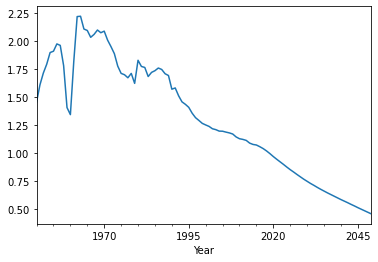

In [47]:
pop_growth['Annual Growth Rate (%)'].plot();

시각화 함수들은 결과물 출력을 커스터마이징하기 위해 여러 가지 [패러미터](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)를 가지고 있습니다. 그것들은 본질적으로 맷플랏립 함수들을 둘러싸고 있는 래퍼(**wrapper**)이기 때문에 판다스 공식문서에 언급되어 있지 않은 여러 맷플랏립 패러미터들 또한 허용하고 있습니다. 판다스는 데이터프레임으로 다양한 시각화 결과물을 만들기 위한 [가이드](https://pandas.pydata.org/pandas-docs/stable/visualization.html)를 제공합니다.

*Copyright 2021.* 퀀트대디. *This content is licensed solely for personal use. Redistribution or publication of this material is strictly prohibited.*